In [1]:
from deepface import DeepFace

In [2]:
import cv2

In [3]:
img = cv2.imread('happy-boy.jpeg')

In [4]:
import matplotlib.pyplot as plt

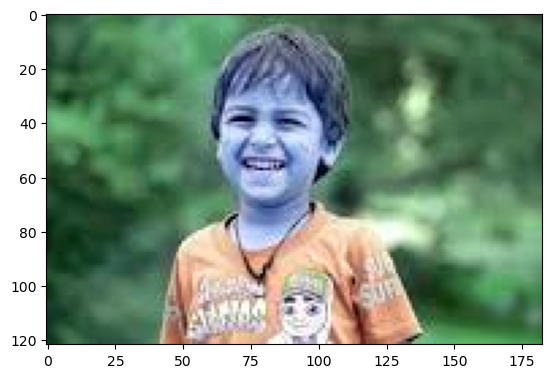

In [5]:
plt.imshow(img)

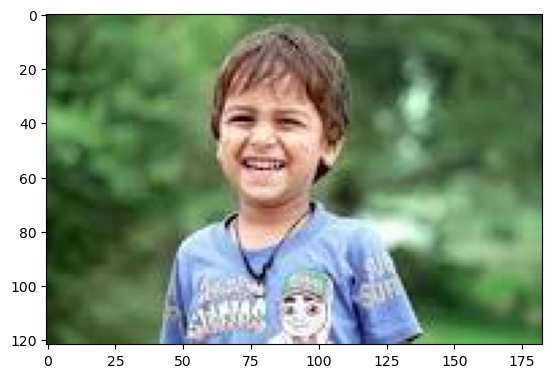

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
predictions = DeepFace.analyze(img)

Action: race: 100%|███████████████████████████████| 4/4 [00:06<00:00,  1.60s/it]


In [8]:
predictions

[{'emotion': {'angry': 0.0006756891252734931,
   'disgust': 2.076777741747901e-11,
   'fear': 1.6396533908391575e-05,
   'happy': 99.99929666519165,
   'sad': 1.714985700118632e-05,
   'surprise': 1.021464249989501e-09,
   'neutral': 2.946975163897747e-08},
  'dominant_emotion': 'happy',
  'region': {'x': 55,
   'y': 18,
   'w': 51,
   'h': 51,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.94,
  'age': 23,
  'gender': {'Woman': 1.9777590408921242, 'Man': 98.02224040031433},
  'dominant_gender': 'Man',
  'race': {'asian': 7.238052011737615e-05,
   'indian': 0.00243547470710043,
   'black': 6.52461732451895e-06,
   'white': 91.17258734539672,
   'middle eastern': 7.439417835439315,
   'latino hispanic': 1.3854788510786802},
  'dominant_race': 'white'}]

In [9]:
type(predictions)

list

In [10]:
predictions[0]['dominant_emotion']

'happy'

In [11]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(faceCascade.empty())
faces = faceCascade.detectMultiScale(gray,1.1,4)
#Draw a rectangle around the faces
for(x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

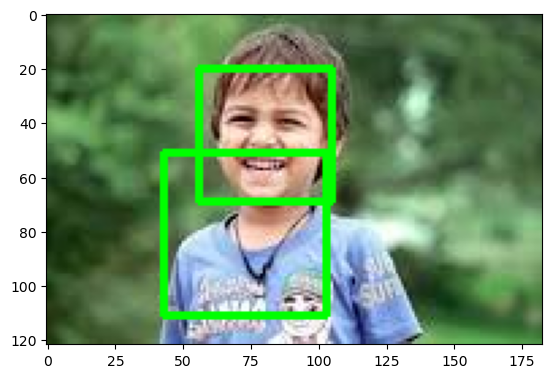

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
font = cv2.FONT_HERSHEY_SIMPLEX
#use putTest() method for
#inserting text on video
cv2.putText(img,
           predictions[0]['dominant_emotion'],
           (0, 50),
           font, 1,
           (0, 0, 255),
           2,
           cv2.LINE_4);

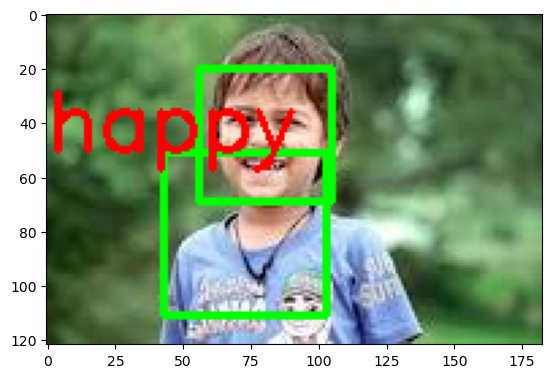

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
img =cv2.imread('surprised.jpeg')

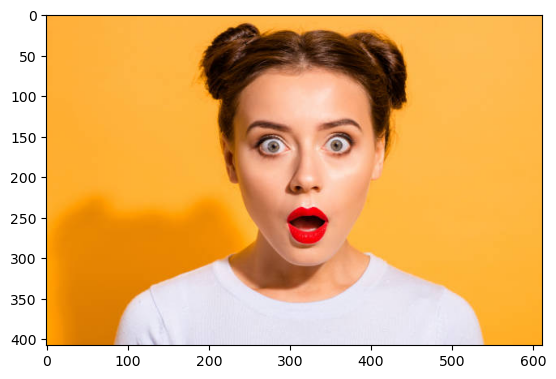

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [26]:
predictions = DeepFace.analyze(img)

Action: race: 100%|███████████████████████████████| 4/4 [00:02<00:00,  1.56it/s]


In [19]:
predictions

[{'emotion': {'angry': 0.028686673103930284,
   'disgust': 3.297464718204132e-11,
   'fear': 12.559396021438118,
   'happy': 3.9198587632347626,
   'sad': 83.45815736554177,
   'surprise': 8.073141263446113e-05,
   'neutral': 0.03381734892854405},
  'dominant_emotion': 'sad',
  'region': {'x': 206,
   'y': 66,
   'w': 229,
   'h': 229,
   'left_eye': (320, 256),
   'right_eye': (274, 160)},
  'face_confidence': 0.9,
  'age': 37,
  'gender': {'Woman': 18.86448562145233, 'Man': 81.13551139831543},
  'dominant_gender': 'Man',
  'race': {'asian': 2.5099532312126893,
   'indian': 0.8463586253737584,
   'black': 0.17312624126680143,
   'white': 79.3791281806903,
   'middle eastern': 6.5891664677361526,
   'latino hispanic': 10.502266764775918},
  'dominant_race': 'white'}]

In [20]:
img =cv2.imread('surprise.jpeg')

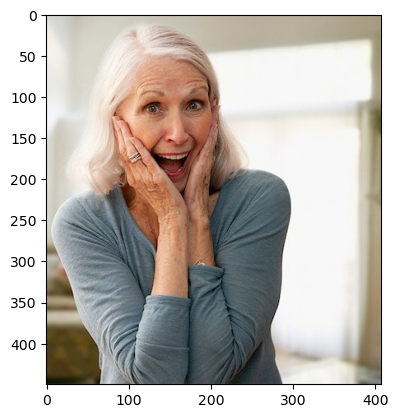

In [21]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [22]:
predictions = DeepFace.analyze(img)

Action: race: 100%|███████████████████████████████| 4/4 [00:00<00:00,  7.22it/s]


In [23]:
predictions

[{'emotion': {'angry': 5.744933559981291e-05,
   'disgust': 5.429313902892982e-13,
   'fear': 86.14246249198914,
   'happy': 2.5610879106352513e-05,
   'sad': 0.000172851264323981,
   'surprise': 13.856881856918335,
   'neutral': 0.00039662008930463344},
  'dominant_emotion': 'fear',
  'region': {'x': 79,
   'y': 57,
   'w': 148,
   'h': 148,
   'left_eye': (178, 111),
   'right_eye': (130, 115)},
  'face_confidence': 0.94,
  'age': 40,
  'gender': {'Woman': 99.79633092880249, 'Man': 0.20366653334349394},
  'dominant_gender': 'Woman',
  'race': {'asian': 0.01059390779118985,
   'indian': 0.028861206374131143,
   'black': 0.0005965518539596815,
   'white': 94.41505074501038,
   'middle eastern': 4.098115861415863,
   'latino hispanic': 1.4467822387814522},
  'dominant_race': 'white'}]

In [34]:
import cv2
from deepface import DeepFace
import numpy as np
from concurrent.futures import ThreadPoolExecutor

# Load the face cascade for detecting faces
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

# ThreadPoolExecutor for asynchronous processing
executor = ThreadPoolExecutor(max_workers=2)

def analyze_face(frame):
    # Convert frame to RGB for DeepFace
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    try:
        # Analyze the frame for emotions
        result = DeepFace.analyze(frame_rgb, actions=['emotion'], enforce_detection=False)
        return result[0]['dominant_emotion']
    except ValueError:
        # Handle the case where no faces are detected
        return "No face detected"

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Resize frame for faster processing
    small_frame = cv2.resize(frame, (640, 480))

    gray = cv2.cvtColor(small_frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    # Run face analysis asynchronously
    future = executor.submit(analyze_face, small_frame)

    for (x, y, w, h) in faces:
        cv2.rectangle(small_frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Get the result from the future
    emotion = future.result()

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(small_frame, emotion, (10, 50), font, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow('Emotion Detection System', small_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()